In [14]:
import pandas as pd

In [12]:
import numpy as np

In [11]:
import h5py

In [51]:
import pandas.io.data as web
import datetime
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2016,12,23)
f = web.DataReader("F", 'yahoo', start,end)

In [52]:
f.ix['2010-01-04']

Open         1.017000e+01
High         1.028000e+01
Low          1.005000e+01
Close        1.028000e+01
Volume       6.085580e+07
Adj Close    8.660986e+00
Name: 2010-01-04 00:00:00, dtype: float64

In [53]:
type(f)

pandas.core.frame.DataFrame

In [54]:
stockSymbolDict = {'F':'Ford Motor Co.', 'GOOGL':'Google'}
memo= []
for stock in stockSymbolDict.keys():
    f = web.DataReader(stock, 'yahoo', start,end)
    memo.append(f)
    
    

In [55]:
f.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04',
               '2016-08-05', '2016-08-08', '2016-08-09', '2016-08-10',
               '2016-08-11', '2016-08-12'],
              dtype='datetime64[ns]', name=u'Date', length=1665, freq=None)

In [63]:
"""
All matplotlib date plotting is done by converting date instances into
days since the 0001-01-01 UTC.  The conversion, tick locating and
formatting is done behind the scenes so this is most transparent to
you.  The dates module provides several converter functions date2num
and num2date

"""
def plot_dateChart(ylab,title,x,y):
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    yearsFmt = mdates.DateFormatter('%Y')
    fig, ax = plt.subplots()
    ax.plot(x, y)
    #ax.plot(f.index, f.Close)
    # format the ticks
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)
    plt.xlabel('Date')
    plt.ylabel(ylab)
    plt.title(title)
    datemin = datetime.date(f.index.min().year, 1, 1)
    datemax = datetime.date(f.index.max().year + 1, 1, 1)
    ax.set_xlim(datemin, datemax)
    # format the coords message box
    def price(x):
        return '$%1.2f' % x
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.format_ydata = price
    ax.grid(True)
    fig.autofmt_xdate()

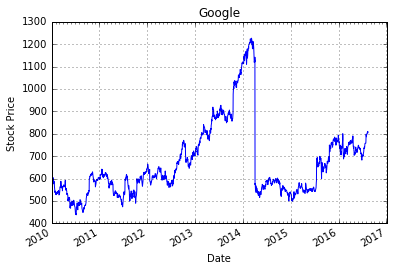

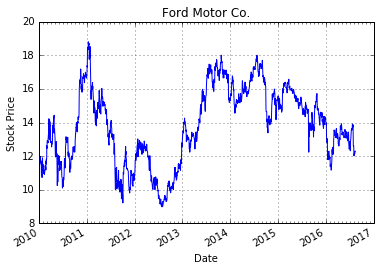

In [62]:
for i, stock in enumerate(memo):
    plot_dateChart('Stock Price', stockSymbolDict.values()[i],memo[i].index, memo[i].Open)
    